# Import statements

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Paths

In [21]:
weekly_2008 = 'Weekly 2008/Full_data_weekly_2008.csv'

In [30]:
data = pd.read_csv(weekly_2008)

In [31]:
data.head()

,Week,debt,Date,Change %,Dummy_Monthy,stockmarketcrash,economicboom,recession,bullmarket,bearmarket,financialcrisis,Price
0,1/6/08,67,6-Jan-08,-0.75%,52,12,65,48,48,22,2,1401.02
1,1/13/08,69,13-Jan-08,-5.41%,51,15,27,73,50,38,2,1325.19
2,1/20/08,69,20-Jan-08,0.41%,50,32,55,100,90,52,3,1330.61
3,1/27/08,68,27-Jan-08,4.87%,49,13,67,44,39,25,3,1395.42
4,2/3/08,71,3-Feb-08,-4.60%,48,12,36,35,53,17,2,1331.29


In [32]:
# Check if any of the values are null
data.isnull().any()

Week                False
debt                False
Date                False
Change %            False
Dummy_Monthy        False
stockmarketcrash    False
economicboom        False
recession           False
bullmarket          False
bearmarket          False
financialcrisis     False
Price               False
dtype: bool

In [33]:
data.corr()

,debt,Dummy_Monthy,stockmarketcrash,economicboom,recession,bullmarket,bearmarket,financialcrisis,Price
debt,1.000000,-0.356581,0.794161,0.029634,0.599710,0.588191,0.247071,0.883672,-0.518830
Dummy_Monthy,-0.356581,1.000000,-0.192127,0.170612,-0.098969,-0.123344,0.041900,-0.531408,0.839023
stockmarketcrash,0.794161,-0.192127,1.000000,0.099472,0.503604,0.554786,0.308187,0.858048,-0.325495
economicboom,0.029634,0.170612,0.099472,1.000000,0.114672,0.137944,-0.219413,0.006505,0.021035
recession,0.599710,-0.098969,0.503604,0.114672,1.000000,0.575404,0.312608,0.454628,-0.457440
bullmarket,0.588191,-0.123344,0.554786,0.137944,0.575404,1.000000,0.562969,0.518801,-0.400369
bearmarket,0.247071,0.041900,0.308187,-0.219413,0.312608,0.562969,1.000000,0.213656,-0.140610
financialcrisis,0.883672,-0.531408,0.858048,0.006505,0.454628,0.518801,0.213656,1.000000,-0.597913
Price,-0.518830,0.839023,-0.325495,0.021035,-0.457440,-0.400369,-0.140610,-0.597913,1.000000


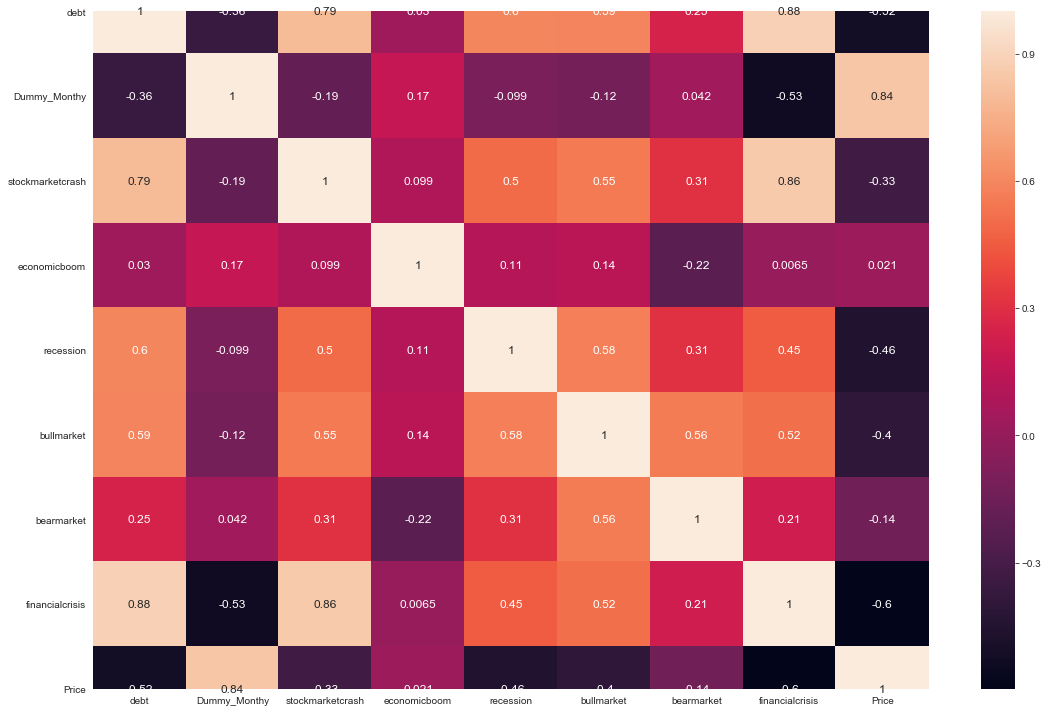

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 12})
sns.set_style('white')

plt.tight_layout()
plt.show()


In [35]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
triangle_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7,
        8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6,
        7, 8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 6, 7, 8, 6, 7, 8, 7, 8,
        8]))

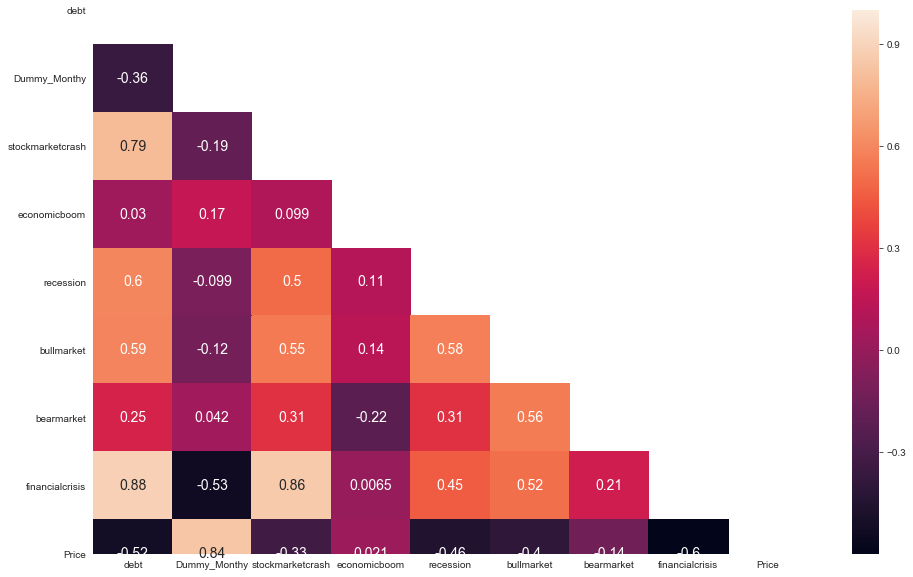

In [36]:
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.show()

In [43]:
# Linear Regression Model for 2008 weekly data

price = np.log(data['Price'])
search_term = data.drop(['Price','Week', 'Date', 'Change %'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(search_term, price, test_size=0.3, random_state=43)


regr = LinearRegression(n_jobs=1)
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})



/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-values
const,7.024676,0.000
debt,0.001065,0.689
Dummy_Monthy,0.006498,0.000
stockmarketcrash,0.005925,0.007
economicboom,-0.000402,0.459
recession,-0.002408,0.002
bullmarket,-0.002277,0.047
bearmarket,0.000015,0.986
financialcrisis,-0.005657,0.014


In [47]:
# Removing Insignificant P values ie. P values < 0.05

In [49]:
# Revised Linear Regression Model

price = np.log(data['Price'])
search_term = data.drop(['Price','Week', 'Date', 'Change %', 'economicboom', 'bearmarket', 'debt'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(search_term, price, test_size=0.3, random_state=43)

regr = LinearRegression(n_jobs=1)
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})



/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-values
const,7.070151,0.000
Dummy_Monthy,0.006296,0.000
stockmarketcrash,0.006108,0.004
recession,-0.002320,0.001
bullmarket,-0.002182,0.014
financialcrisis,-0.005583,0.007


In [51]:
print('Training data R squared',regr.score(X_train, y_train))
print('Testing data R Squared', regr.score(X_test, y_test))


Training data R squared 0.8816992296795523
Testing data R Squared 0.6010514258458983
